In [2]:
import os
import csv
from PIL import Image
import colorsys
import numpy as np
from tqdm import tqdm

# 이미지의 픽셀값을 분석하여 색상 분포를 얻습니다.
def analyze_colors(image_array):

    color_counters = {
        "Dark": 0, "Mid": 0, "Bright": 0,
        "Warm": 0, "Cool": 0,
        "Red": 0, "Orange": 0, "Brown" : 0, "Gold": 0, "Yellow": 0,"Lime": 0, "Green": 0,
        "Mint": 0, "SeaBlue": 0, "Sky": 0, "Blue": 0, "Purple": 0, "Pink": 0,
        "Black" : 0, "White" : 0, "Grey" : 0
    }

    warm_colors = set(['Red', 'Orange', 'Brown', 'Gold', 'Yellow', 'Lime', 'Pink'])
    cool_colors = set(['Green', 'Mint', 'SeaBlue', 'Sky', 'Blue', 'Purple', 'Black', 'White', 'Grey'])

    for row in image_array:
        for pixel in row:
            r, g, b = pixel
            h, s, v = colorsys.rgb_to_hsv(r/255.0, g/255.0, b/255.0)

            check_sv = (s >= 0.2 and v >= 0.2)

            # 밝기
            if v <= 0.3:
                color_counters["Dark"] += 1
            elif v >= 0.7:
                color_counters["Bright"] += 1
            else:
                color_counters["Mid"] += 1
            
            # 지배색
            if 344/360 <= h or h <= 14/360 and check_sv:
                color_counters["Red"] += 1
            elif 15/360 <= h <= 38/360  and check_sv:
                color_counters["Orange"] += 1
            elif 15/360 <= h <= 45/360 and 0.25 <= s <= 0.75 and 0.3 <= v <= 0.7:
                color_counters["Brown"] += 1
            elif 39/360 <= h <= 50/360  and check_sv:
                color_counters["Gold"] += 1
            elif 51/360 <= h <= 63/360  and check_sv:
                color_counters["Yellow"] += 1
            elif 64/360 <= h <= 83/360  and check_sv:
                color_counters["Lime"] += 1
            elif 84/360 <= h <= 160/360  and check_sv:
                color_counters["Green"] += 1
            elif 161/360 <= h <= 175/360  and check_sv:
                color_counters["Mint"] += 1
            elif 176/360 <= h <= 185/360 and check_sv:
                color_counters["SeaBlue"] += 1
            elif 186/360 <= h <= 205/360 and check_sv:
                color_counters["Sky"] += 1
            elif 206/360 <= h <= 260/360 and check_sv:
                color_counters["Blue"] += 1
            elif 261/360 <= h <= 290/360 and check_sv:
                color_counters["Purple"] += 1
            elif 291/360 <= h <= 343/360 and check_sv:
                color_counters["Pink"] += 1
            else :
                if v < 0.2:
                    color_counters["Black"] += 1
                elif v > 0.8:
                    color_counters["White"] += 1
                else:
                    color_counters["Grey"] += 1                    

    color_counters['Warm'] = sum([color_counters[color] for color in warm_colors])
    color_counters['Cool'] = sum([color_counters[color] for color in cool_colors])

    total_pixels = image_array.shape[0] * image_array.shape[1]
    color_ratios = {k: v / total_pixels for k, v in color_counters.items()}

    return color_ratios


# 이미지 분석을 위한 함수
def analyze_image(image_path):
    # 이미지를 불러와서 RGB로 변환합니다.
    
    image = Image.open(image_path)
    image = image.convert("RGB")

    # 이미지를 numpy array로 변환합니다.
    image_array = np.array(image)

    # 색상 분석 로직
    return analyze_colors(image_array)

# 디렉토리의 이미지들을 분석하고 결과를 CSV로 저장하는 함수
def analyze_directory_to_csv(directory_path, csv_file_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    files = [f for f in os.listdir(directory_path) if any(f.lower().endswith(ext) for ext in image_extensions)]

    with open(csv_file_path, 'w', newline='') as csvfile:
        fieldnames = [
            'Filename', "Warm", "Cool",
            "Bright", "Mid", "Dark",
            "Red", "Orange", "Brown", "Gold", "Yellow", "Lime", "Green", "Mint", "SeaBlue", "Sky", "Blue", "Purple", "Pink",
            "Black", "White", "Grey"
        ]
        
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for filename in tqdm(files, desc="Analyzing images"):
            image_path = os.path.join(directory_path, filename)
            color_ratios = analyze_image(image_path)
            
            # CSV 파일에 결과를 기록하기 위해 새로운 row 생성
            row = {
            'Filename': filename,
            'Warm': color_ratios['Warm'],
            'Cool': color_ratios['Cool'],
            'Bright': color_ratios['Bright'],
            'Mid': color_ratios['Mid'],
            'Dark': color_ratios['Dark'],
            'Red': color_ratios['Red'],
            'Orange': color_ratios['Orange'],
            'Brown': color_ratios['Brown'],
            'Gold': color_ratios['Gold'],
            'Yellow': color_ratios['Yellow'],
            'Lime': color_ratios['Lime'],
            'Green': color_ratios['Green'],
            'Mint': color_ratios['Mint'],
            'SeaBlue': color_ratios['SeaBlue'],
            'Sky': color_ratios['Sky'],
            'Blue': color_ratios['Blue'],
            'Purple': color_ratios['Purple'],
            'Pink': color_ratios['Pink'],
            'Black': color_ratios['Black'],
            'White': color_ratios['White'],
            'Grey': color_ratios['Grey'],
            }
            
            writer.writerow(row)

# 이미지 분석을 실행하고 CSV 파일로 결과를 저장
directory_path = r"C:\Users\gjaischool\Desktop\새 폴더"  # 이미지가 저장된 디렉토리 경로
csv_file_path = 'analysis_results.csv'  # 결과를 저장할 CSV 파일 경로
analyze_directory_to_csv(directory_path, csv_file_path)


Analyzing images:   0%|          | 0/10 [00:00<?, ?it/s]

Analyzing images: 100%|██████████| 10/10 [01:32<00:00,  9.29s/it]


In [3]:
# 색온도,지배색,밝기 레이블
import pandas as pd

# 메타데이터 파일 로드
file_path = 'analysis_results.csv'
metadata = pd.read_csv(file_path)

# 색온도에 따른 지배색 분류 기준 정의
colors_by_temp = {
    'Warm': ['Red', 'Orange', 'Brown', 'Gold', 'Yellow', 'Lime', 'Pink'],
    'Cool': ['Green', 'Mint', 'SeaBlue', 'Sky', 'Blue', 'Purple',  "Black", "White", "Grey"]
}

brightness = ['Bright', 'Mid', 'Dark']

# 라벨링을 위한 리스트 초기화
tone_labels = []
dominant_color_labels = []
brightness_labels = []

# 각 이미지에 대한 라벨링 수행
for index, row in metadata.iterrows():
    # 색온도 결정
    tone = 'Warm' if row['Warm'] > row['Cool'] else 'Cool'
    tone_labels.append(tone)

    # 지배색 결정 (색온도에 따라)
    color_values = {color: row[color] for color in colors_by_temp[tone]}
    dominant_color = max(color_values, key=color_values.get)
    dominant_color_labels.append(dominant_color)

    # 밝기 결정
    bright_values = {b: row[b] for b in brightness}
    bright = max(bright_values, key=bright_values.get)
    brightness_labels.append(bright)

# 라벨링된 데이터를 메타데이터에 추가
metadata['Tone'] = tone_labels
metadata['DominantColor'] = dominant_color_labels
metadata['Brightness'] = brightness_labels

# 변경된 메타데이터를 새 파일로 저장
metadata.to_csv(csv_file_path, index=False)

In [4]:
# Graycoprops 추출
import os
import numpy as np
from skimage import feature, color, io
import pandas as pd
from tqdm import tqdm

def calculate_graycoprops(image_path):
    # 이미지를 읽고 그레이스케일로 변환
    image = io.imread(image_path)
    # RGBA 이미지인 경우 RGB로 변환
    if image.shape[2] == 4:
        image = color.rgba2rgb(image)
        
    gray_image = color.rgb2gray(image)
    gray_image_scaled = (gray_image * 255).astype(np.uint8)

    # GLCM 생성 및 Graycoprops 계산
    glcm = feature.greycomatrix(gray_image_scaled, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = feature.greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = feature.greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = feature.greycoprops(glcm, 'homogeneity')[0, 0]
    energy = feature.greycoprops(glcm, 'energy')[0, 0]
    correlation = feature.greycoprops(glcm, 'correlation')[0, 0]

    return contrast, dissimilarity, homogeneity, energy, correlation

def add_graycoprops_to_csv(folder_path, csv_file_path):
    # 기존 CSV 파일 불러오기
    existing_df = pd.read_csv(csv_file_path)

    # 새로운 데이터를 저장할 딕셔너리 생성
    new_data = {'Contrast': [], 'Dissimilarity': [], 'Homogeneity': [], 'ASM/Energy': [], 'Correlation': []}

    # 폴더 내의 모든 이미지 파일에 대해 Graycoprops 계산 및 추가
    for image_file in tqdm(os.listdir(folder_path), desc='Processing images'):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, image_file)
            graycoprops_values = calculate_graycoprops(image_path)
            for key, value in zip(new_data.keys(), graycoprops_values):
                new_data[key].append(value)

    # 기존 데이터 프레임에 새로운 컬럼 추가
    for key in new_data:
        existing_df[key] = new_data[key]

    # CSV 파일로 다시 저장
    existing_df.to_csv(csv_file_path, index=False)

csv_file_path = 'analysis_results.csv'  # 기존 CSV 파일 경로 설정
add_graycoprops_to_csv(directory_path, csv_file_path)

Processing images:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and wil

Contrast(밝기 대비):<br>
최대값: 65025 (0-255 범위의 8비트 이미지에서)<br>
높은 값: 이미지에서 뚜렷한 대비가 있으며, 픽셀 간 밝기 차이가 크다는 것을 의미합니다.<br>
낮은 값: 대비가 덜 뚜렷하고, 이미지의 질감이 상대적으로 부드러움을 나타냅니다.<br>

Dissimilarity(픽셀 쌍 사이의 밝기차이):<br>
최대값: 255 (0-255 범위의 8비트 이미지에서)<br>
높은 값: 픽셀 쌍 사이의 밝기 차이가 크며, 이미지의 질감이 불균일할 수 있음을 의미합니다.<br>
낮은 값: 픽셀 쌍의 밝기 차이가 작아, 이미지가 더 균일하다는 것을 나타냅니다.<br>

Homogeneity(균일도):<br>
최대값: 1<br>
높은 값: 이미지의 균일도가 높으며, 픽셀 간의 밝기 차이가 작음을 나타냅니다.<br>
낮은 값: 픽셀 간에 밝기 차이가 크고, 질감이 불균일하다는 것을 의미합니다.<br>

ASM (Angular Second Moment) / Energy(균일성과 질감의 규칙성):<br>
최대값: 1<br>
높은 값: 이미지의 질감이 매우 규칙적이고 균일함을 나타냅니다.<br>
낮은 값: 질감이 불규칙하고 다양하며, 반복성이 낮음을 의미합니다.<br>

Correlation(픽셀 쌍 사이의 밝기차이 상관관계):<br>
최대값: 1<br>
높은 값: 픽셀 쌍 사이에 밝기 값의 강한 상관관계가 있음을 나타내며, 질감이 일정한 패턴을 가짐을 의미합니다.<br>
낮은 값: 픽셀 간의 밝기 값이 서로 관련이 없거나 무작위적이라는 것을 나타내며, 질감이 불규칙하거나 무질서할 수 있습니다.<br>

Contrast:<br>
높은 값: 높은 대비는 강렬하고 선명한 이미지를 만들어, 사람들에게 강한 시각적 인상을 줄 수 있습니다. 이는 자극적이거나 드라마틱한 느낌을 줄 수 있습니다.<br>
낮은 값: 낮은 대비는 부드럽고 섬세한 느낌을 줍니다. 이는 평온하고 안정적인 감정을 유발할 수 있습니다.<br>

Dissimilarity:<br>
높은 값: 불균일한 질감은 복잡하고 혼란스러운 느낌을 줄 수 있으며, 때로는 불안정하거나 긴장된 감정을 유발할 수 있습니다.<br>
낮은 값: 균일한 질감은 질서와 조화를 나타내며, 이는 편안하고 안정적인 느낌을 줄 수 있습니다.<br>

Homogeneity:<br>
높은 값: 일관된 질감은 편안함과 친숙함을 불러일으킬 수 있습니다. 이는 이미지가 진정되고 편안한 감정을 줄 수 있습니다.<br>
낮은 값: 불균일한 질감은 새롭고 독특한 느낌을 줄 수 있으며, 때로는 예상치 못한 감정이나 호기심을 유발할 수 있습니다.<br>

ASM / Energy:<br>
높은 값: 규칙적이고 균일한 질감은 질서와 조화를 느끼게 하며, 안정감을 줄 수 있습니다.<br>
낮은 값: 불규칙한 질감은 독창성과 복잡성을 나타내며, 이는 호기심이나 탐험적인 느낌을 줄 수 있습니다.<br>

Correlation:<br>
높은 값: 강한 상관관계는 질감의 일관성과 패턴을 나타냅니다. 이는 질서와 조화로운 느낌을 줄 수 있으며, 안정감과 예측 가능성을 제공합니다.<br>
낮은 값: 낮은 상관관계는 무질서와 불규칙성을 나타냅니다. 이는 불확실함과 혼란을 느끼게 할 수 있으며, 때로는 창의성이나 독특함을 연상시킬 수 있습니다.<br>

In [10]:
# 이미지캡션 라벨링
import os
import pandas as pd
from tqdm import tqdm
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch

# 모델, 토크나이저 및 피처 추출기 로드
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 캡션 생성을 위한 설정
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

# 캡션 생성 함수
def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

# 이미지 폴더의 경로 및 CSV 파일 경로
folder_path = r"C:\Users\gjaischool\Desktop\img"
csv_file_path = "analysis_results.csv"  # CSV 파일 경로

# 폴더 내 모든 이미지 파일의 경로 가져오기
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]


# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)

# 새 컬럼 생성
if 'caption' not in df.columns:
    df['caption'] = ''

# 캡션 생성 및 결과 저장
for idx, img_path in tqdm(enumerate(image_paths), total=len(image_paths)):
    caption = predict_step([img_path])[0]
    # 파일 이름만 추출
    image_name = os.path.basename(img_path)
    # CSV 파일에 캡션 저장
    df.loc[df['Filename'] == image_name, 'caption'] = caption

# 변경된 DataFrame을 CSV 파일로 저장
df.to_csv(csv_file_path, index=False)


100%|██████████| 100/100 [00:50<00:00,  1.98it/s]


In [ ]:
# 질감분석
import numpy as np
from skimage import feature, color, io

def extract_hog_and_graycoprops(image_path):
    # 이미지를 읽고 그레이스케일로 변환
    image = io.imread(image_path)
    gray_image = color.rgb2gray(image)

    # GLCM 생성 및 Graycoprops 계산
    gray_image_scaled = (gray_image * 255).astype(np.uint8)
    glcm = feature.greycomatrix(gray_image_scaled, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    contrast = feature.greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = feature.greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = feature.greycoprops(glcm, 'homogeneity')[0, 0]
    energy = feature.greycoprops(glcm, 'energy')[0, 0]
    correlation = feature.greycoprops(glcm, 'correlation')[0, 0]

    return (contrast, dissimilarity, homogeneity, energy, correlation)


image_path = 'imgData100\img_ (1).jpg'
graycoprops_values = extract_hog_and_graycoprops(image_path)

print("Graycoprops Values:", graycoprops_values)

Graycoprops Values: (394.8082191780822, 11.296141144814088, 0.14587367412780733, 0.01280507813206698, 0.9241522207864274)


c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.grayco

c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\gjaischool\anaconda3\envs\MetaWave\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


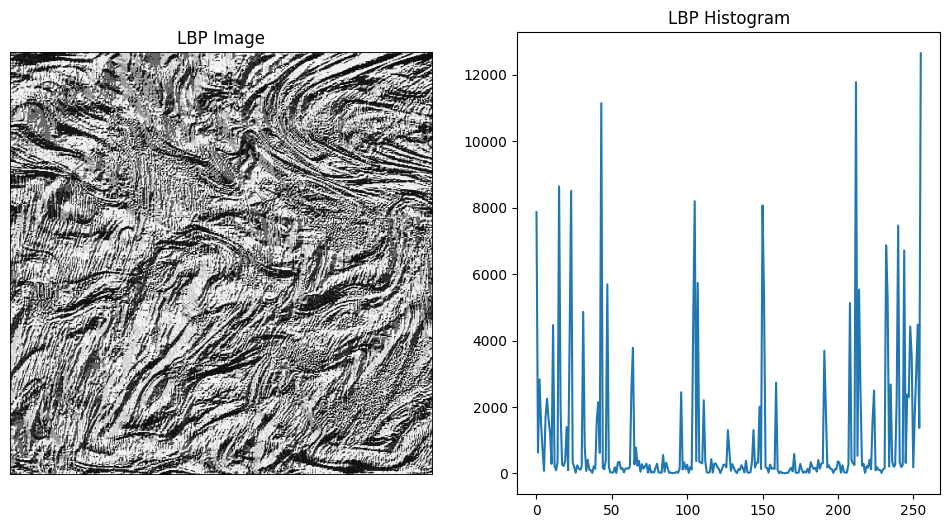

In [3]:
# 이미지패턴분석
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_lbp(image_path):
    # 이미지를 그레이 스케일로 읽어오기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # LBP 연산
    lbp = np.zeros_like(image)
    neighs = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j) != (0, 0)]
    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            binary_string = ''
            for dy, dx in neighs:
                binary_string += '1' if image[y+dy, x+dx] >= image[y, x] else '0'
            lbp[y, x] = int(binary_string, 2)
    
    # LBP 히스토그램 계산
    lbp_hist = cv2.calcHist([lbp], [0], None, [256], [0, 256])
    return lbp, lbp_hist

def plot_lbp(lbp, lbp_hist):
    # LBP 이미지 표시
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Image')
    plt.axis('off')

    # LBP 히스토그램 표시
    plt.subplot(1, 2, 2)
    plt.plot(lbp_hist)
    plt.title('LBP Histogram')
    plt.show()

# 사용 예시
if __name__ == "__main__":
    image_path = r"C:\Users\gjaischool\Desktop\img\abstract_chicote-cfc_2668.jpg"  # 이미지 파일 경로
    lbp, lbp_hist = compute_lbp(image_path)
    plot_lbp(lbp, lbp_hist)


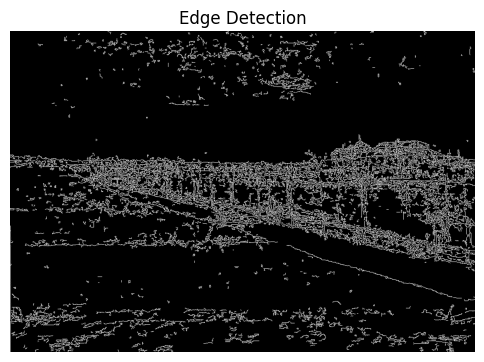

In [5]:
import cv2
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = r"C:\Users\gjaischool\Desktop\img\landscape (682).jpg"

# 이미지를 흑백으로 불러옵니다.
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 형태: Canny 엣지 검출기를 사용하여 엣지 추출
edges = cv2.Canny(image, 100, 200)

# 엣지 결과 시각화
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')  # 축을 숨깁니다.
plt.show()


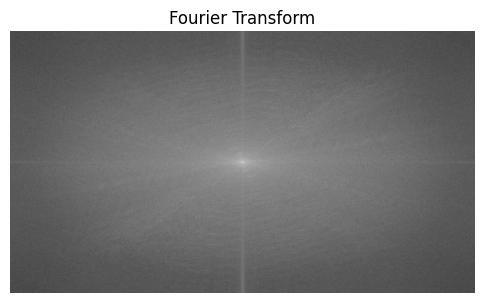

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = 'eat.png'

# 이미지를 흑백으로 불러옵니다.
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 질감: 푸리에 변환을 적용하여 공간 빈도 특성 추출
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# 푸리에 변환 결과 시각화
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')  # 축을 숨깁니다.
plt.show()


In [ ]:
# 하트코딩된 무드테마매핑
import pandas as pd

matching_rules = {
    'dramatic': ['Red', 'Brown', "Dakr"],
    'deep': ['Cool', 'Blue', 'Dark'],
    'inspiring': ['Warm', 'Gold', 'Bright'],
    'soft': ['Warm', 'Pink', 'Mid'],
    'fun': ['Warm', 'Yellow', 'Bright'],
    'funny': ['Warm', 'Orange', 'Bright'],
    'positive': ['Warm', 'Green', 'Bright'],
    'summer': ['Warm', 'Sky', 'Bright'],
    'dream': ['Cool', 'Sky', 'Mid'],
    'romantic': ['Warm', 'Pink', 'Bright'],
    'hopeful': ['Warm', 'Yellow', 'Bright'],
    'groovy': ['Warm', 'Gold', 'Bright'],
    'space': ['Cool', 'Purple', 'Dark'],
    'soundscape': ['Cool', 'Blue', 'Mid'],
    'slow': ['Warm', 'Brown', 'Dark'],
    'sport': ['Cool', 'Green', 'Bright'],
    'sexy': ['Warm', 'Red', 'Dark'],
    'fast': ['Cool', 'Grey', 'Bright'],
    'nature': ['Warm', 'Green', 'Mid'],
    'commercial': ['Cool', 'Gold', 'Bright'],
    'mellow': ['Warm', 'Orange', 'Mid'],
    'holiday': ['Warm', 'Gold', 'Bright'],
    'christmas': ['Cool', 'Red', 'Mid'],
    'game': ['Cool', 'Purple', 'Bright'],
    'travel': ['Warm', 'Blue', 'Bright'],
    'party': ['Warm', 'Pink', 'Bright'],
    'upbeat': ['Warm', 'Yellow', 'Bright'],
    'movie': ['Cool', 'Grey', 'Mid'],
    'powerful': ['Cool', 'Black', 'Dark'],
    'corporate': ['Cool', 'Blue', 'Mid'],
    'background': ['Cool', 'Grey', 'Mid'],
    'film': ['Cool', 'Grey', 'Mid'],
    'melodic': ['Cool', 'Brown', 'Mid'],
    'relaxing': ['Cool', 'Blue', 'Mid'],
    'energetic': ['Warm', 'Yellow', 'Bright'],
    'happy': ['Warm', 'Yellow', 'Bright'],
    'melancholic': ['Cool', 'Purple', 'Dark'],
    'meditative': ['Cool', 'SeaBlue', 'Mid'],
    'drama': ['Cool', 'Purple', 'Mid'],
    'adventure': ['Warm', 'Sky', 'Bright'],
    'heavy': ['Cool', 'Black', 'Dark'],
    'dark': ['Cool', 'Black', 'Dark'],
    'cool': ['Cool', 'Blue','Mid'],
    'emotional': ['Cool', 'Pink', 'Mid'],
    'ambiental': ['Cool', 'Sky', 'Mid'],
    'calm': ['Cool', 'SeaBlue', 'Mid'],
    'children': ['Warm', 'Lime', 'Bright'],
    'love': ['Warm', 'Pink', 'Bright'],
    'retro': ['Warm', 'Orange', 'Bright'],
    'ballad': ['Cool', 'Purple', 'Mid'],
    'advertising': ['Warm', 'Gold', 'Bright'],
    'epic': ['Warm', 'Orange', 'Bright'],
    'action': ['Warm', 'Red', 'Bright']
}

data = pd.read_csv("analysis_results.csv")



# 데이터셋의 각 행에 대해 분위기를 결정합니다.
data['Mood'] = data.apply(lambda row: determine_mood(row, matching_rules), axis=1)

# 데이터셋을 CSV 파일로 저장합니다.
data.to_csv("analysis_results.csv", index=False)

data[['Filename', 'Tone', 'DominantColor', 'Brightness', 'Mood']].head()